In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler, minmax_scale

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

from sklearn.cluster import MeanShift, estimate_bandwidth

from itertools import cycle
from sklearn.mixture import GaussianMixture

import statsmodels.api as sm

import statsmodels.formula.api as smf

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
# Regresion lineal
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

import statsmodels.api as sm

import statsmodels.formula.api as smf

# from pandas_profiling import ProfileReport

# Para preparar los datos
from sklearn.preprocessing import LabelEncoder

# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 

# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier

# Para usar Random Tree Forest como clasificador
from sklearn.ensemble import RandomForestClassifier

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import model_selection

# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV

# Para la validación cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

#Librerías para la visualización
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns 
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

#SMF
import statsmodels.formula.api as smf

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

# check version number
import imblearn

from collections import Counter

from imblearn.over_sampling import SMOTE, ADASYN

# Análisis Goles por Liga

In [4]:
# Se cargan los datos
# Ubicación de los datos, deben estar en la misma carpeta que este notebook
# pais = "belgica"
# liga = "pro-league"

# file = open(f"versiones/{pais}_{liga}.txt", "r")
# version = int(file.read())-1
# file.close()

db_location = f"datos_premier_final_partidos.xlsx"
db_location2 = f"proximos_partidos.xlsx"

# db_location= "data_matches_mismarcadores_half0.xlsx"


# Se leen los datos, estan separados con ','
# data1 = pd.read_excel(db_location, sheet_name="Premier League 20222023")
# data2 = pd.read_excel(db_location, sheet_name="Premier League 20212022")
# data = pd.concat([data1,data2])
data = pd.read_excel(db_location)

proximos_partidos= pd.read_excel(db_location2)

In [5]:
data.columns

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'HG', 'AG', 'HP', 'AP',
       'HTS', 'ATS', 'HSI', 'ASI', 'HSO', 'ASO', 'HBS', 'ABS', 'HFK', 'AFK',
       'HC', 'AC', 'HOFF', 'AOFF', 'HTI', 'ATI', 'HGS', 'AGS', 'HF', 'AF',
       'HRC', 'ARC', 'HYC', 'AYC', 'HTP', 'ATP', 'HPC', 'APC', 'HT', 'AT',
       'HA', 'AA', 'HDA', 'ADA', 'Resultado', 'Fecha', 'HPCru', 'APCru', 'HTo',
       'ATo', 'HInter', 'AInter', 'HDAG', 'ADAG', 'HDespeje', 'ADespeje',
       'HGK', 'AGK', 'HPelotazos', 'APelotazos', 'HxG', 'AxG'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  363 non-null    int64  
 1   Date        363 non-null    object 
 2   HomeTeam    363 non-null    object 
 3   AwayTeam    363 non-null    object 
 4   HG          363 non-null    int64  
 5   AG          363 non-null    int64  
 6   HP          363 non-null    object 
 7   AP          363 non-null    object 
 8   HTS         363 non-null    int64  
 9   ATS         363 non-null    int64  
 10  HSI         363 non-null    int64  
 11  ASI         363 non-null    int64  
 12  HSO         363 non-null    int64  
 13  ASO         363 non-null    int64  
 14  HBS         363 non-null    int64  
 15  ABS         363 non-null    int64  
 16  HFK         350 non-null    float64
 17  AFK         350 non-null    float64
 18  HC          363 non-null    int64  
 19  AC          363 non-null    i

In [7]:
data.fillna(value=0,inplace=True)
data

,Unnamed: 0,Date,HomeTeam,AwayTeam,HG,AG,HP,AP,HTS,ATS,...,HDAG,ADAG,HDespeje,ADespeje,HGK,AGK,HPelotazos,APelotazos,HxG,AxG
0,4,20.05.2023 11:30,Nottingham Forest,Arsenal,1,0,18%,82%,6,11,...,9,25,22,14,7,2,70,37,0.6,0.6
1,5,20.05.2023 09:00,Bournemouth,Manchester Utd,0,1,41%,59%,10,20,...,7,10,21,15,9,3,56,63,1.2,1.4
2,6,20.05.2023 09:00,Fulham,Crystal Palace,2,2,49%,51%,11,11,...,13,12,23,18,7,12,63,62,1.7,1.6
3,7,20.05.2023 09:00,Liverpool,Aston Villa,1,1,66%,34%,10,6,...,13,7,22,44,2,8,76,81,0.7,1.3
4,8,20.05.2023 09:00,Wolves,Everton,1,1,53%,47%,13,19,...,15,25,29,5,10,8,57,87,1.6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,363,06.08.2022 09:00,Leeds Utd,Wolves,2,1,39%,61%,12,15,...,9,7,23,17,9,9,60,72,0.8,1.3
359,364,06.08.2022 09:00,Newcastle,Nottingham Forest,2,0,62%,38%,23,5,...,12,16,14,37,2,12,64,70,1.7,0.3
360,365,06.08.2022 09:00,Tottenham,Southampton,4,1,58%,42%,18,10,...,13,11,20,21,5,4,85,61,1.5,0.5
361,366,06.08.2022 06:30,Fulham,Liverpool,2,2,33%,67%,9,11,...,23,13,31,16,8,5,77,94,1.2,1.2


In [8]:
# corr_df=data.corr(method='pearson')

# plt.figure(figsize=(40, 30))
# sns.heatmap(corr_df, annot=True)
# plt.show()

In [9]:
def conseguir_anio(texto):
    return (texto.split()[0]).split(".")[2]
def conseguir_mes(texto):
    return (texto.split()[0]).split(".")[1]
def conseguir_dia(texto):
    return (texto.split()[0]).split(".")[0]
def quitar_por(texto):
    return (texto.replace("%",""))    

In [10]:
data['year'] = (data['Date'].apply(conseguir_anio))
data['month'] = (data['Date'].apply(conseguir_mes))
data['day'] = (data['Date'].apply(conseguir_dia))
data['HP'] = data['HP'].apply(quitar_por)
data['AP'] = data['AP'].apply(quitar_por)
data['year'] = data['year'].astype(int)
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)
data['HP'] = data['HP'].astype(int)
data['AP'] = data['AP'].astype(int)
data['Fecha']= pd.to_datetime(data[['year','month','day']])

data['TG'] = data['HG'] + data['AG']
data['TxG'] = data['HxG'] + data['AxG']
data['Mas2Goles'] = np.where(data['TG'] > 2,1,0)

data_backup= data.copy()

In [11]:
selected_cols = ['HSI','ASI','HGS','AGS','HTo','ADespeje']

In [12]:
string = ""
for i in data_backup.columns:
    string=string+ i +"+"
string= string[:-1]
string

'Unnamed: 0+Date+HomeTeam+AwayTeam+HG+AG+HP+AP+HTS+ATS+HSI+ASI+HSO+ASO+HBS+ABS+HFK+AFK+HC+AC+HOFF+AOFF+HTI+ATI+HGS+AGS+HF+AF+HRC+ARC+HYC+AYC+HTP+ATP+HPC+APC+HT+AT+HA+AA+HDA+ADA+Resultado+Fecha+HPCru+APCru+HTo+ATo+HInter+AInter+HDAG+ADAG+HDespeje+ADespeje+HGK+AGK+HPelotazos+APelotazos+HxG+AxG+year+month+day+TG+TxG+Mas2Goles'

In [13]:
data['TG'].value_counts()

2    84
3    76
1    67
4    55
5    28
0    22
6    17
7    10
8     2
9     2
Name: TG, dtype: int64

In [14]:
data_backup_2=  data_backup.copy()
data_backup = data_backup[(data_backup['TG']>0) & (data_backup['TG']<6)].copy()

In [15]:
data_backup['TG'].value_counts()

2    84
3    76
1    67
4    55
5    28
Name: TG, dtype: int64

In [16]:
data['Mas2Goles'].value_counts()

1    190
0    173
Name: Mas2Goles, dtype: int64

In [17]:
'HPCru+APCru+HTo+ATo+HInter+AInter+HDAG+ADAG+HDespeje+ADespeje+HGK+AGK+HPelotazos+APelotazos+HxG+AxG'

'HPCru+APCru+HTo+ATo+HInter+AInter+HDAG+ADAG+HDespeje+ADespeje+HGK+AGK+HPelotazos+APelotazos+HxG+AxG'

In [18]:
lm1 = smf.ols(formula = 'TG ~ HSI+ASI+HGS+AGS+HTo+ADespeje', data=data_backup).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TG   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2926.
Date:                Wed, 24 May 2023   Prob (F-statistic):          6.93e-265
Time:                        11:54:08   Log-Likelihood:                 123.55
No. Observations:                 310   AIC:                            -233.1
Df Residuals:                     303   BIC:                            -206.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0034      0.054     -0.063      0.950      -0.110       0.103
HSI            0.9766      0.009    109.419      0.000       0.959       0.994
ASI            0.9843      0.010    101.859      0.000       0.965       1.003
HGS           -0.9894      0.011    -86.841      0.000      -1.012      -0.967
AGS           -0.9816      0.011    -92.956      0.000      -1.002      -0.961
HTo            0.0003   8.85e-05      3.220      0.001       0.000       0.000
ADespeje      -0.0027      0.001     -2.329      0.021      -0.005      -0.000
==============================================================================
Omnibus:                      343.536   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9918.823
Skew:                           5.079   Prob(JB):                         0.00
Kurtosis:                      28.783   Cond. No.                     3.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Selección sub-datasets

In [19]:
x_drop=data_backup[selected_cols]
feature_names= selected_cols
X = np.array(x_drop)
y = np.array(data_backup['TG'])

# Smote

In [20]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# Estandarización

In [21]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [22]:
ss = StandardScaler()
X_tr_df= pd.DataFrame(X_train,columns=feature_names)
y_tr_df= pd.DataFrame(y_train,columns=['TG'])
train_comp= pd.concat([X_tr_df,y_tr_df],1)

X_te_df= pd.DataFrame(X_test,columns=feature_names)
y_te_df= pd.DataFrame(y_test,columns=['TG'])
test_comp= pd.concat([X_te_df,y_te_df],1)

# Estandarizacion X_train
X_train_estd = ss.fit_transform(train_comp)
X_train_estd = pd.DataFrame(X_train_estd,columns=train_comp.columns)

# Estandarizacion X_test
X_test_estd = ss.transform(test_comp)
X_test_estd = pd.DataFrame(X_test_estd,columns=test_comp.columns)

#Separar de nuevo X's y y's
X_train= np.array(X_train_estd.drop(['TG'],1))
X_test= np.array(X_test_estd.drop(['TG'],1))
# y_train= np.array(X_train_estd['PasoONo'])
# y_test= np.array(X_test_estd['PasoONo'])

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_35348\3009045962.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  train_comp= pd.concat([X_tr_df,y_tr_df],1)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_35348\3009045962.py:8: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  test_comp= pd.concat([X_te_df,y_te_df],1)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_35348\3009045962.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train= np.array(X_train_estd.drop(['TG'],1))
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_35348\3009045962.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test= np.array(X_test_estd.drop(['TG'],1))


In [44]:
# Guardar la standarización en archivo pickel
pickle.dump(ss, open('scaler.pkl', 'wb'))

# Prueba varios modelos

In [23]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

models,predictions =  LazyClassifier(random_state=1001).fit(X_train,X_test,y_train,y_test)

print(models)
print(predictions)

100%|██████████| 29/29 [00:00<00:00, 56.63it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LinearDiscriminantAnalysis         0.94               0.94    None      0.94   
QuadraticDiscriminantAnalysis      0.94               0.94    None      0.94   
NuSVC                              0.79               0.78    None      0.78   
CalibratedClassifierCV             0.74               0.74    None      0.72   
LinearSVC                          0.71               0.72    None      0.68   
LogisticRegression                 0.71               0.71    None      0.70   
SVC                                0.63               0.63    None      0.63   
Perceptron                         0.59               0.59    None      0.60   
LGBMClassifier                     0.56               0.56    None      0.56   
ExtraTreesClassifier               0.53               0.53    None      0.53   
PassiveAggressiveClassifier        0.52 

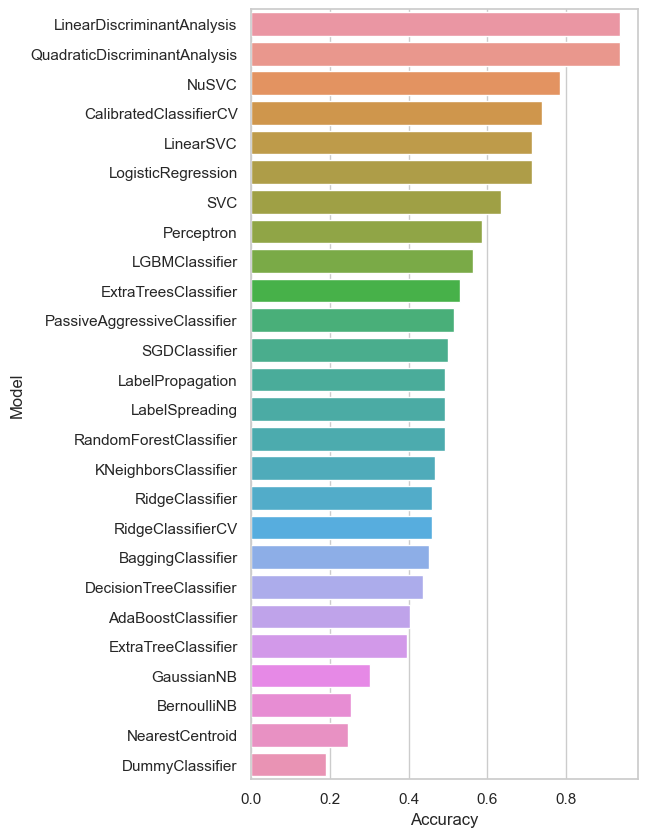

In [24]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Accuracy", data=predictions)

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# model=DecisionTreeClassifier(random_state=1001)
model=LinearDiscriminantAnalysis()

model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [26]:
model.score(X_test,y_test)

0.9365079365079365

In [27]:
name='Decission Tree Classifier'
kfold = model_selection.KFold(n_splits=10, random_state=1001,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Decission Tree Classifier: 0.948966 (0.031433)


In [28]:
predictions_train = model.predict(X_train)
print(accuracy_score(y_train, predictions_train))

0.9489795918367347


Text(29.75, 0.5, 'Actual label')

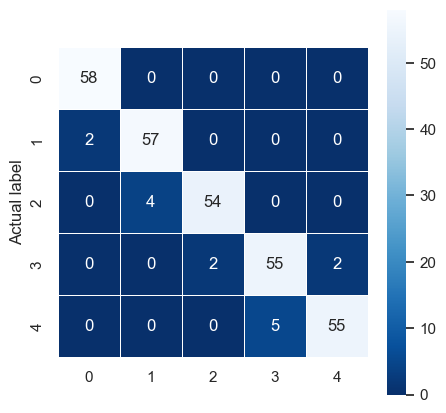

In [33]:
# Dibujar matriz de connfusion
cm = confusion_matrix(y_train, predictions_train)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')

In [34]:
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        58
           2       0.93      0.97      0.95        59
           3       0.96      0.93      0.95        58
           4       0.92      0.93      0.92        59
           5       0.96      0.92      0.94        60

    accuracy                           0.95       294
   macro avg       0.95      0.95      0.95       294
weighted avg       0.95      0.95      0.95       294



In [35]:
predictions1 = model.predict(X_test)
print(accuracy_score(y_test, predictions1))

0.9365079365079365


Text(29.75, 0.5, 'Actual label')

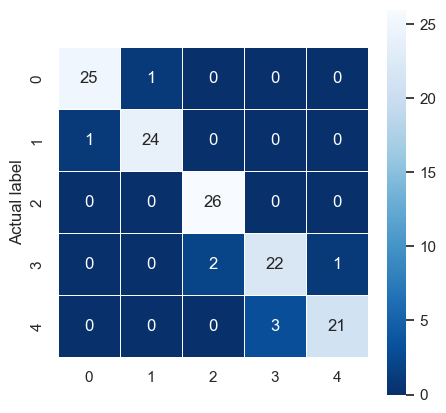

In [37]:
# Dibujar matriz de connfusion test
cm = confusion_matrix(y_test, predictions1)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')

In [38]:
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96        26
           2       0.96      0.96      0.96        25
           3       0.93      1.00      0.96        26
           4       0.88      0.88      0.88        25
           5       0.95      0.88      0.91        24

    accuracy                           0.94       126
   macro avg       0.94      0.94      0.94       126
weighted avg       0.94      0.94      0.94       126



In [40]:
# Guardar el modelo como un archivo pickle
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [42]:
X_test[0].shape

(6,)

In [43]:
selected_cols

['HSI', 'ASI', 'HGS', 'AGS', 'HTo', 'ADespeje']

In [45]:
type(X_test[0])

numpy.ndarray

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a4052e7-2e71-4dc5-adb3-89f874561d93' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>